# 타이타닉 생존자 예측

### 1. 데이터셋 개요

 타이타닉 데이터셋은 타이타닉 침몰 사건에서 승객들의 생존 여부와 관련된 정보를 포함한다.

### 2. 데이터 변수 설명
PassengerId: 승객 고유 ID

Survived: 생존 여부 (0 = 사망, 1 = 생존)

Pclass: 좌석 등급 (1 = 1등석, 2 = 2등석, 3 = 3등석)

SibSp: 형제자매/배우자 수

Parch: 부모/자녀 수

Cabin: 객실 번호

Embarked: 탑승한 항구 (C = Cherbourg, Q = Queenstown, S = Southampton)

In [3]:
#필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#데이터 불러오기
df = pd.read_csv('C:/Users/minmi/Downloads/Titanic-Dataset.csv')

df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
#변수의 형태 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#필요없는 칼럼 제거하기

columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df = df.drop(columns=columns_to_drop)

# 결과 확인
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
#데이터 뒤에서 3번째까지 불러오기
df.tail(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
888,0,3,female,NaN,1,2,23.45,S
889,1,1,male,26.0,0,0,30.00,C
890,0,3,male,32.0,0,0,7.75,Q


## EDA - 데이터 개형, 인사이트, 전처리 준비

In [8]:
df.shape #891의 행과 8개의 컬럼으로 구성

(891, 8)

In [9]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
#데이터의 기초통계량
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df2=df.copy() #복사본 만들기
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## Age 결측값 처리

### 1단계: 변수 간 상관관계 분석

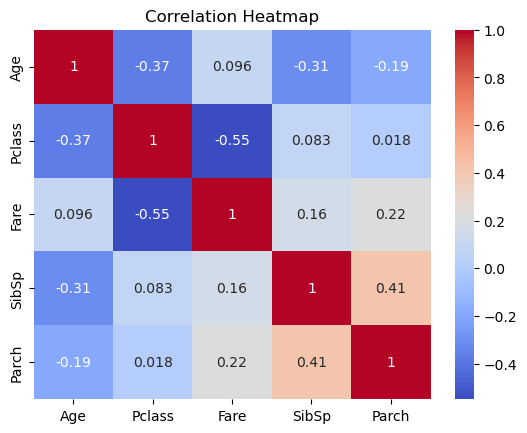

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수 간 상관관계 매트릭스
corr_matrix = df2[['Age', 'Pclass', 'Fare', 'SibSp', 'Parch']].corr()

# 히트맵 시각화
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### 범주형 변수와 Age의 관계 시각화

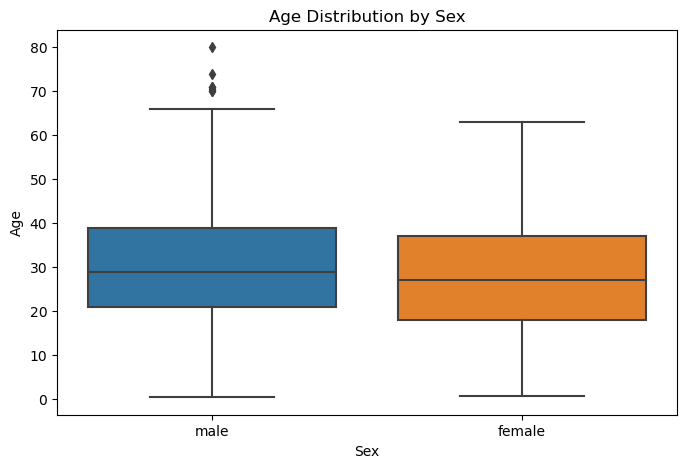

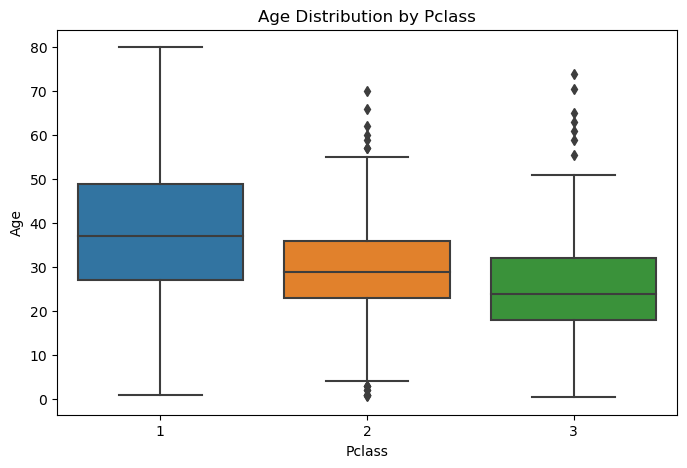

In [13]:
# 성별에 따른 나이 분포 확인
plt.figure(figsize=(8, 5))
sns.boxplot(data=df2, x='Sex', y='Age')
plt.title('Age Distribution by Sex')
plt.show()

# Pclass에 따른 나이 분포 확인
plt.figure(figsize=(8, 5))
sns.boxplot(data=df2, x='Pclass', y='Age')
plt.title('Age Distribution by Pclass')
plt.show()


### 여러 변수 간 관계 시각화

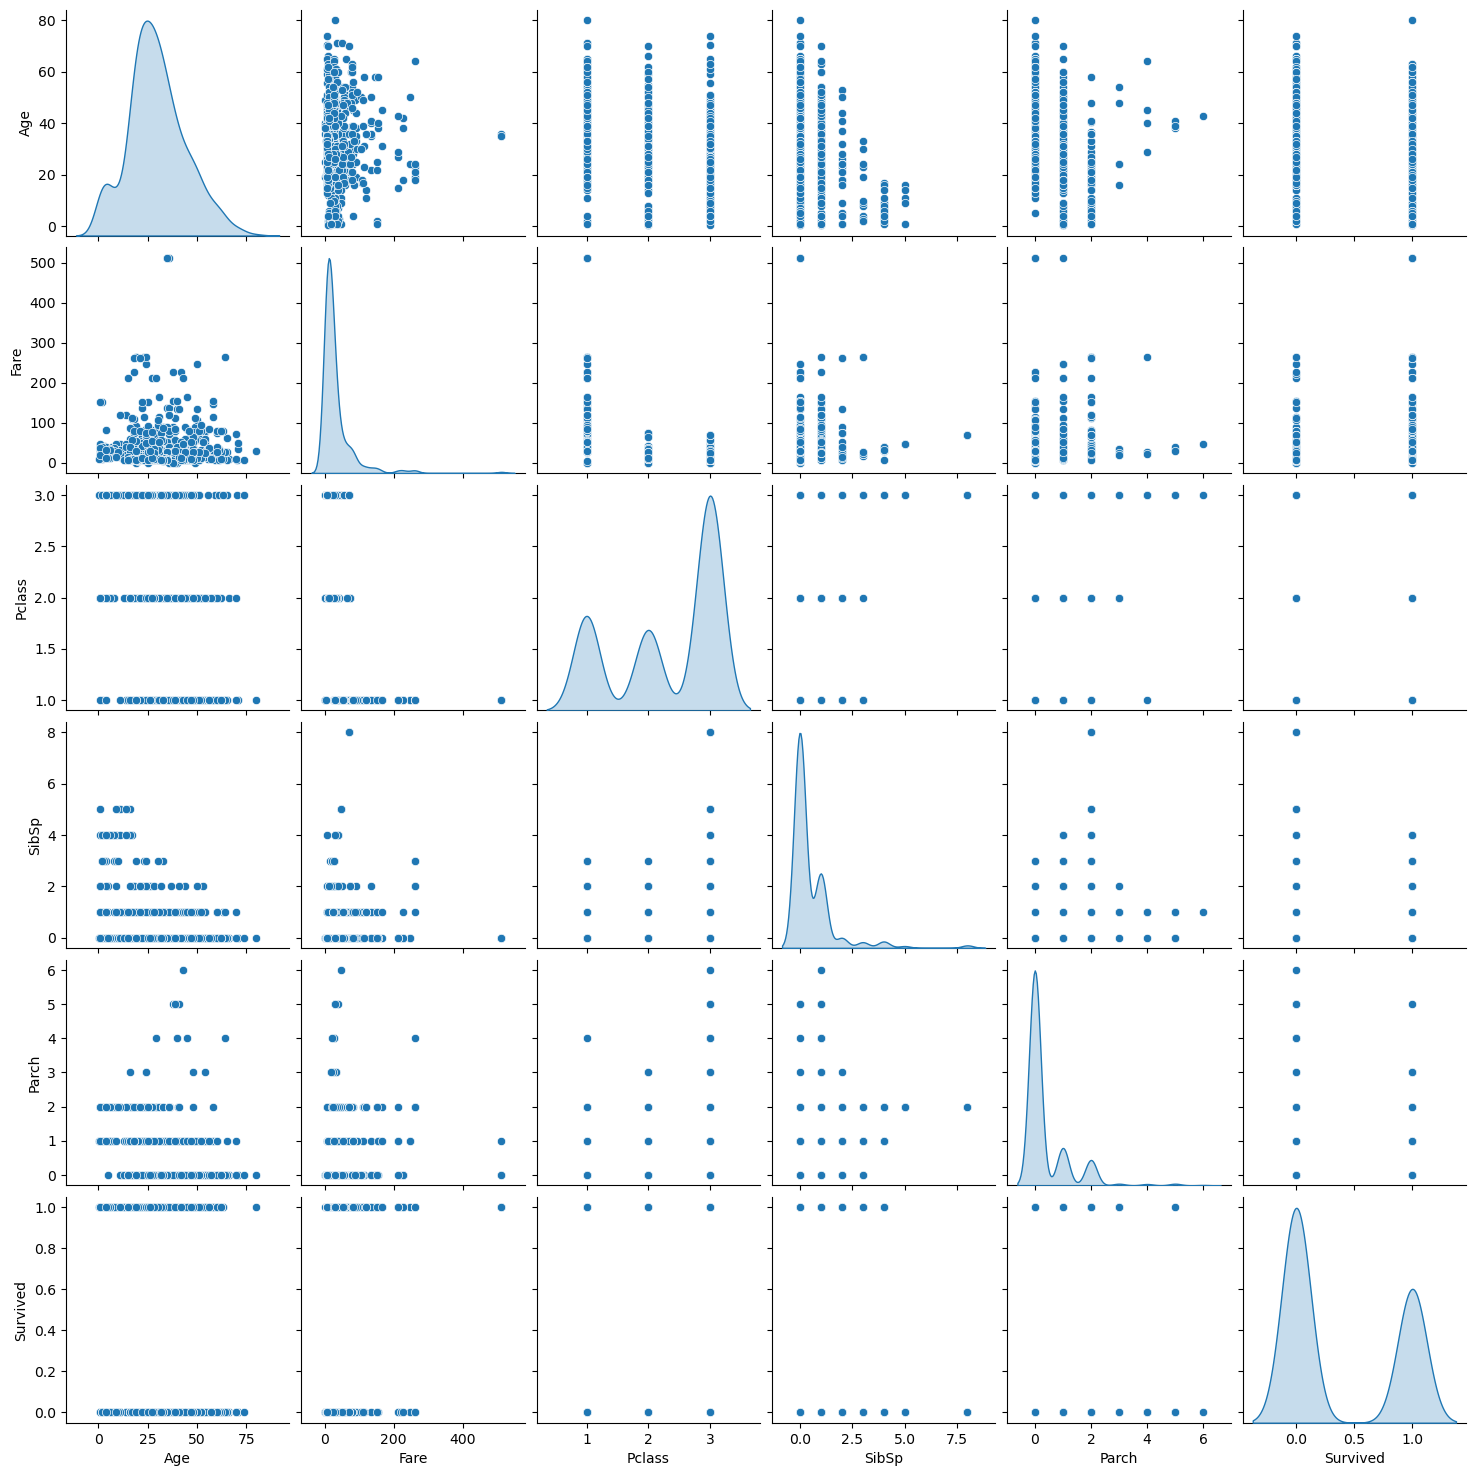

In [14]:
sns.pairplot(df2[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Survived']], diag_kind='kde')
plt.show()


**변수별 분석**
- pclass: 나이가 객실 등급에 따라 차이가 있다. 1등급에는 대체적으로 나이가 많고, 3등급에는 젊은 승객들이 탑승하는 경향이 있다.
- Fare: 나이와 약간의 양의 상관관계를 보인다.
- SibSp/Parch: Age와 뚜렷한 상관관계를 보이지 않는다
- Survived: 약간의 관계는 있지만, 결정적인 관계로 보이지 않는다.

=> Age의 결측값은 Pclass와 Sax를 기준으로 그룹을 나누고, 해당 그룹의 평균 나이로 채우는 것이 적절해보인다.

In [15]:
# Pclass와 Sex별 평균 나이로 결측값 채우기
df2['Age'] = df2.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))

# 결과 확인
print(df2['Age'].isna().sum())  # 결측값이 모두 채워졌는지 확인


0


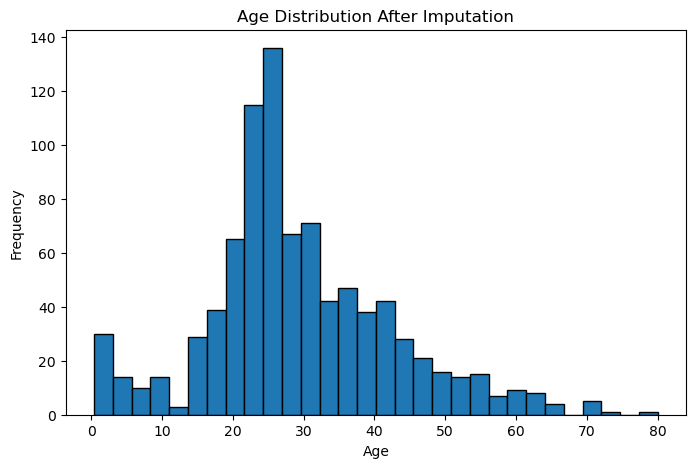

In [16]:
#나이 시각화
import matplotlib.pyplot as plt

# Age 분포 시각화
plt.figure(figsize=(8, 5))
plt.hist(df2['Age'], bins=30, edgecolor='k')
plt.title('Age Distribution After Imputation')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


시각화를 통해 본 결과, 이상치도 없어보인다

## Embarked 결측치 처리

In [17]:
# 결측값이 있는 행 찾기
na_embarked_rows = df[df['Embarked'].isna()]

# 결과 출력
print(na_embarked_rows)


     Survived  Pclass     Sex   Age  SibSp  Parch  Fare Embarked
61          1       1  female  38.0      0      0  80.0      NaN
829         1       1  female  62.0      0      0  80.0      NaN


In [18]:
# df2에서 1등급 승객 중 Embarked 카운트
b=df2[df2['Pclass'] == 1]
b['Embarked'].value_counts()

#항구가 Q일 확률은 매우 낮아보임

S    127
C     85
Q      2
Name: Embarked, dtype: int64

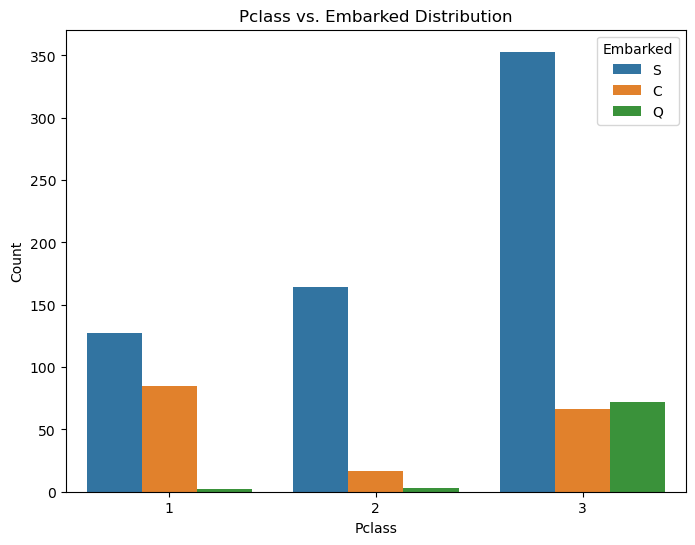

In [19]:
#Pclass vs. Embarked 분포

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass', hue='Embarked')
plt.title('Pclass vs. Embarked Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Embarked')
plt.show()


1등급 승객의 C항구 출발 비율이 상당히 높다
- 1등급 승객 중 S도 많긴 하지만, C항구에서 탑승한 경우가 상대적으로 더 두드러진다.
    
    
    => 따라서 1등급 승객의 분포를 고려하여, C에서 탑승했을 가능성이 크다.

In [20]:
# 'Embarked' 결측치를 'C'로 채우기
df2['Embarked'].fillna('C', inplace=True)

# 결측치 확인
print(df2['Embarked'].isnull().sum())


0


## 범주형 변수 인코딩 -성별과 항구

In [21]:
# One-Hot Encoding
df2 = pd.get_dummies(df2, columns=['Sex'], drop_first=True)
print(df2.head())
#sex: 남성=1, 여성=0

   Survived  Pclass   Age  SibSp  Parch     Fare Embarked  Sex_male
0         0       3  22.0      1      0   7.2500        S         1
1         1       1  38.0      1      0  71.2833        C         0
2         1       3  26.0      0      0   7.9250        S         0
3         1       1  35.0      1      0  53.1000        S         0
4         0       3  35.0      0      0   8.0500        S         1


In [22]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
label_encoder_embarked = LabelEncoder()
df2['Embarked'] = label_encoder_embarked.fit_transform(df2['Embarked'])
print(df2[['Embarked']].head())


# C = 0, Q = 1, S = 2로 인코딩

   Embarked
0         2
1         0
2         2
3         2
4         2


In [23]:
df2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.318643,0.523008,0.381594,32.204208,1.531987,0.647587
std,0.486592,0.836071,13.281103,1.102743,0.806057,49.693429,0.794531,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.750000,0.000000,0.000000,7.910400,1.000000,0.000000
50%,0.000000,3.000000,26.507589,0.000000,0.000000,14.454200,2.000000,1.000000
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000,2.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000


기초통계량으로 볼때 이상치는 없어보이므로 이상치 제거는 진행하지 않는다. 
- 요금의 경우 0원이 존재할 수 있으므로.. 

In [24]:
df2.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
Survived,1.000000,-0.338481,-0.067485,-0.035322,0.081629,0.257307,-0.174199,-0.543351
Pclass,-0.338481,1.000000,-0.407015,0.083081,0.018443,-0.549500,0.170334,0.131900
Age,-0.067485,-0.407015,1.000000,-0.251313,-0.180705,0.118308,-0.019950,0.112851
SibSp,-0.035322,0.083081,-0.251313,1.000000,0.414838,0.159651,0.070653,-0.114631
Parch,0.081629,0.018443,-0.180705,0.414838,1.000000,0.216225,0.042325,-0.245489
Fare,0.257307,-0.549500,0.118308,0.159651,0.216225,1.000000,-0.229304,-0.182333
Embarked,-0.174199,0.170334,-0.019950,0.070653,0.042325,-0.229304,1.000000,0.115513
Sex_male,-0.543351,0.131900,0.112851,-0.114631,-0.245489,-0.182333,0.115513,1.000000


Sex_male과 Survived, Fare과 Pclass은 높은 상관관계를 보인다..

## 데이터 분할

In [25]:
#생존을 예측하기 위해 생존값을 Y로 하며 X,Y의 칼럼을 분할한다.
X=df2[['Pclass','Age','SibSp','Parch','Fare','Embarked','Sex_male']]
Y=df2['Survived']
print(X.head(3))
print(Y.head(3))

   Pclass   Age  SibSp  Parch     Fare  Embarked  Sex_male
0       3  22.0      1      0   7.2500         2         1
1       1  38.0      1      0  71.2833         0         0
2       3  26.0      0      0   7.9250         2         0
0    0
1    1
2    1
Name: Survived, dtype: int64


In [35]:
from sklearn.model_selection import train_test_split 
X_train, X_test,y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

In [36]:
X_train.shape

(712, 7)

In [37]:
X_test.shape

(179, 7)

In [29]:
#필요한 라이브러리 임포트
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

## 로지스틱 회귀 모델

In [38]:
#스케일링 하기
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
#스케일링 적용하기
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)

[[ 0.82831288 -1.26920626  0.44200774 ... -0.43307042 -1.97451274
   0.74926865]
 [-1.54019624 -2.08370012  0.44200774 ...  2.38210185  0.57463154
   0.74926865]
 [ 0.82831288  1.59769449 -0.4755127  ... -0.51708921  0.57463154
   0.74926865]
 ...
 [ 0.82831288 -0.38708295 -0.4755127  ... -0.50020319  0.57463154
   0.74926865]
 [-0.35594168  1.52418422 -0.4755127  ... -0.39779155  0.57463154
   0.74926865]
 [-1.54019624  0.88327651 -0.4755127  ... -0.65862601  0.57463154
   0.74926865]]


In [43]:
#하이퍼파라미터 튜닝을 위한 그리드 설정
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}


In [45]:
#로지스틱 회귀모델 생성
clf = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

In [46]:
#GridSearchCV를 이용한 하이퍼파라미터 튜닝 
grid_search = GridSearchCV(estimator=clf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',  # 교차검증 시 정확도 사용
                           n_jobs=-1)

In [47]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, random_state=42,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [48]:
print("최적의 하이퍼파라미터:", grid_search.best_params_)
print("교차검증 최고 정확도: {:.4f}".format(grid_search.best_score_))

최적의 하이퍼파라미터: {'C': 0.1, 'penalty': 'l2'}
교차검증 최고 정확도: 0.8020


In [49]:
# 최적 모델을 이용해 테스트 셋 예측
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

In [52]:
from sklearn.metrics import accuracy_score, f1_score
test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

print("테스트 정확도: {:.4f}".format(test_accuracy))
print("테스트 F1 점수: {:.4f}".format(test_f1))

테스트 정확도: 0.8380
테스트 F1 점수: 0.7752


## 랜덤 포레스트 

In [53]:
# 하이퍼파라미터 그리드
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}


In [57]:
clf_rf = RandomForestClassifier(random_state=42)

In [58]:
# 트리 기반 모델은 스케일링이 필요없으므로 원본 데이터 사용
grid_rf = GridSearchCV(estimator=clf_rf,
                       param_grid=param_grid_rf,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1)


In [59]:
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [62]:
print("=== Random Forest ===")
print("최적의 하이퍼파라미터:", grid_rf.best_params_)
print("교차검증 정확도: {:.4f}".format(grid_rf.best_score_))

=== Random Forest ===
최적의 하이퍼파라미터: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
교차검증 정확도: 0.8245


In [63]:
#테스트셋 예측
y_pred_rf = grid_rf.best_estimator_.predict(X_test)

In [88]:
print("테스트 정확도: {:.4f}".format(accuracy_score(y_test, y_pred_rf)))
print("테스트 F1 점수: {:.4f}".format(f1_score(y_test, y_pred_rf)))

테스트 정확도: 0.8436
테스트 F1 점수: 0.7879


## Gradient Boosting

In [60]:
# 하이퍼파라미터 그리드
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [61]:
clf_gb = GradientBoostingClassifier(random_state=42)

In [65]:
#하이퍼파라미터 튜닝
grid_gb = GridSearchCV(estimator=clf_gb,
                       param_grid=param_grid_gb,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1)

In [66]:
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [67]:
print("=== Gradient Boosting ===")
print("최적의 하이퍼파라미터:", grid_gb.best_params_)
print("교차검증 정확도: {:.4f}".format(grid_gb.best_score_))

=== Gradient Boosting ===
최적의 하이퍼파라미터: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
교차검증 정확도: 0.8146


In [68]:
#테스트셋 예측
y_pred_gb = grid_gb.best_estimator_.predict(X_test)

In [87]:
print("테스트 정확도: {:.4f}".format(accuracy_score(y_test, y_pred_gb)))
print("테스트 F1 점수: {:.4f}".format(f1_score(y_test, y_pred_gb)))

테스트 정확도: 0.8324
테스트 F1 점수: 0.7794


## Support Vector Classifier

In [70]:
#하이퍼파라미터 그리드
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

In [71]:
clf_svc = SVC(probability=True, random_state=42)

In [72]:
#하이퍼파라미터 튜닝
grid_svc = GridSearchCV(estimator=clf_svc,
                        param_grid=param_grid_svc,
                        cv=5,
                        scoring='accuracy',
                        n_jobs=-1)

In [73]:
grid_svc.fit(X_train_scaled, y_train)

C:\Users\minmi\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [75]:
print("=== SVC ===")
print("최적의 하이퍼파라미터:", grid_svc.best_params_)
print("교차검증 정확도: {:.4f}".format(grid_svc.best_score_))


=== SVC ===
최적의 하이퍼파라미터: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
교차검증 정확도: 0.8203


In [76]:
y_pred_svc = grid_svc.best_estimator_.predict(X_test_scaled) #스케일링 사용

In [86]:
print("테스트 정확도: {:.4f}".format(accuracy_score(y_test, y_pred_svc)))
print("테스트 F1 점수: {:.4f}".format(f1_score(y_test, y_pred_svc)))

테스트 정확도: 0.8492
테스트 F1 점수: 0.7769


## K-Nearest Neighbors

In [78]:
#하이퍼파라미터 그리드
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

In [79]:
clf_knn = KNeighborsClassifier()

In [80]:
#하이퍼파라미터 튜닝
grid_knn = GridSearchCV(estimator=clf_knn,
                        param_grid=param_grid_knn,
                        cv=5,
                        scoring='accuracy',
                        n_jobs=-1)

In [81]:
grid_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [83]:
print("=== KNN ===")
print("최적의 하이퍼파라미터:", grid_knn.best_params_)
print("교차검증 정확도: {:.4f}".format(grid_knn.best_score_))

=== KNN ===
최적의 하이퍼파라미터: {'n_neighbors': 9, 'weights': 'uniform'}
교차검증 정확도: 0.8076


In [85]:
y_pred_knn = grid_knn.best_estimator_.predict(X_test_scaled) #스케일링 사용
print("테스트 정확도: {:.4f}".format(accuracy_score(y_test, y_pred_knn)))
print("테스트 F1 점수: {:.4f}".format(f1_score(y_test, y_pred_knn)))

테스트 정확도: 0.8045
테스트 F1 점수: 0.7244


**테스트 정확도를 통한 최종 모델**
SVC가 테스트 정확도: 0.8492로 제일 높은 정확도를 자랑하기에, 최종모델로 선정한다.

-최적의 하이퍼파라미터: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [89]:
#최종 모델 가져오기
svc_best = grid_svc.best_estimator_

In [91]:
#순열 중요도 계산
from sklearn.inspection import permutation_importance

# X_test_scaled와 y_test를 대상으로 10회 반복하여 정확도를 기준으로 중요도 평가
result = permutation_importance(
    svc_best,
    X_test_scaled,
    y_test,
    scoring='accuracy',
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

In [92]:
#각 특성의 중요도
importances = result.importances_mean

In [94]:
#만약 원본 X_train이 DataFrame이라면 feature 이름을 사용하고,
# 아니라면 단순히 "Feature 0", "Feature 1", ... 로 표시
try:
    feature_names = X_train.columns
except AttributeError:
    feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]


In [95]:
print("각 변수(특징)의 순열 중요도:")
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

각 변수(특징)의 순열 중요도:
Pclass: 0.0397
Age: 0.0291
SibSp: 0.0335
Parch: 0.0084
Fare: 0.0073
Embarked: 0.0151
Sex_male: 0.2223


제일 낮은 SibSp: 0.0335을 변수 제거를 하고 모델으 평가해본다

In [97]:
#변수 제거
X_train_new = X_train.drop(columns=['SibSp'])
X_test_new = X_test.drop(columns=['SibSp'])

In [98]:
#스케일링 적용하기
scaler = StandardScaler()
X_train_new_scaled = scaler.fit_transform(X_train_new)
X_test_new_scaled = scaler.transform(X_test_new)

In [99]:
#최적의 svn 모델만들기
svc_model = SVC(C=1, gamma='scale', kernel='rbf', random_state=42)

In [100]:
svc_model.fit(X_train_new_scaled, y_train)

SVC(C=1, random_state=42)

In [101]:
#test 예측하기
y_pred = svc_model.predict(X_test_new_scaled)

In [102]:
accuracy = accuracy_score(y_test, y_pred)
print("테스트 정확도:", accuracy)

테스트 정확도: 0.8268156424581006


변수를 제거한 모델이 더 낮은 정확도를 나타낸다. 그러므로 변수를 제거하기 전인 모든 변수로 한 모델이 제일 좋은 모델이라고 말할 수 있다.